# Introduction to Artificial Neural Network (ANN)

## The Perceptron
### Definition
The perceptron is one of the simplest ANN architectures. Its basis a neuron called linear threshold unit (LTU) depicted as follows:

<img src="./images/fig_LTU.png" width='300'>

The input layer consists of neurons that takes numbers $x_0$, $x_1$, $x_2$, ... as the inputs. The input neurons simply output whatever they are fed. Typically $x_0=1$ serves as the bias term. Each output $x_i$ from the input layer is associated with a weight $w_i$. The LTU computes the weighted sum

$$ z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = \mathbf{w}^T\cdot\mathbf{x}, $$
    
then applies the activation function to the sum $z$.

Two common activation functions

- Heaviside step function 

$$
h(z) = \left\{\begin{array}{cc}
               0 & \mbox{if}\,\, z < 0,\\
               1 & \mbox{if}\,\, z \geq 0.
               \end{array}
        \right. 
$$


- Sign function

    $$ \mbox{sgn}(z) = \left\{\begin{array}{cc}
                 -1 & \mbox{if}\,\, z < 0,\\
                  0 & \mbox{if}\,\, z = 0, \\
                  1 & \mbox{if}\,\, z > 0.
               \end{array}
        \right. $$
    
The perceptron is composed of a single layer of LTUs.

<img src="./images/fig_perceptron.png" width='300'>

### Perception training

How is a perceptron trained? The basic idea is "__Cells that fire together wire together__," which is also refereed to as __Hebb's rule__. The rule states that the connection weight between two neurons is increased whenever they have the same output. The enfore the rule, the weight is updated as follows

$$ w_{i,j}' = w_{i,j} + \eta\,(\hat y_j - y_j)\,x_i, $$

where
- $w_{i,j}$ is the connection weight between the i-th input neuron and the j-th output neuron.
- $x_i$ is the input value of the current training instance.
- $\hat y_i$ is the output of the j-th output neuron for the current training instance.
- $j_i$ is the target ouput of the j-th output neuron for the current training instance.
- $\eta$ is the learning rate.

So for every output neuron that gives a wrong prediction, the equation reinforces the connection weights from the inputs that would have contributed to the correct prediction.

Several notable properties of a single perceptron:
- It is a type of feed-forward network.
- It is a __binary__ classifier. This is because the output is either positive (+1) or negative (0, in the case of step function or -1, in the case of sign function).
- It has a linear decision boundary defined by the condition $\mathbf{w}^T\cdot\mathbf{x}=0$. In other words, the perceptron has only one decision boundary. 
- Scikit-Learn's perceptron implementation resembles its SGD class. In fact, the SGD classifier with `loss="perceptron"`, `learning_rate="constant"`, `eta0=1`, and `penalty=None` hyperparameters is equivalent to Scikit-Learn's peceptron class.
- Peceptrons do not output class probability. They just make predictions based on threshold.

The following code is a simple implementation of a single LTU applied to a linearly separable data set.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['figure.figsize'] = (14.0, 8.0)

import numpy as np
from IPython.display import HTML, display


Initial weight: [ -3.79   -2.93   -1.57]

Epoch:   1,  error:  0.667,   weight: [ -3.79   -2.38   -1.32]
Epoch:   2,  error:  0.833,   weight: [ -3.69   -2.03   -0.97]
Epoch:   3,  error:  0.667,   weight: [ -3.49   -1.78   -0.77]
Epoch:   4,  error:  0.667,   weight: [ -3.29   -1.53   -0.57]
Epoch:   5,  error:  0.667,   weight: [ -3.09   -1.28   -0.37]
Epoch:   6,  error:  0.500,   weight: [ -2.79   -1.23   -0.27]
Epoch:   7,  error:  0.667,   weight: [ -2.59   -0.98   -0.07]
Epoch:   8,  error:  0.500,   weight: [ -2.29   -0.93    0.03]
Epoch:   9,  error:  0.500,   weight: [ -1.99   -0.88    0.13]
Epoch:  10,  error:  0.500,   weight: [ -1.69   -0.83    0.23]
Epoch:  11,  error:  0.500,   weight: [ -1.39   -0.78    0.33]
Epoch:  12,  error:  0.333,   weight: [ -1.19   -0.53    0.33]
Epoch:  13,  error:  0.500,   weight: [ -0.89   -0.48    0.43]
Epoch:  14,  error:  0.333,   weight: [ -0.69   -0.23    0.43]
Epoch:  15,  error:  0.500,   weight: [ -0.39   -0.18    0.53]
Epoch:  16, 

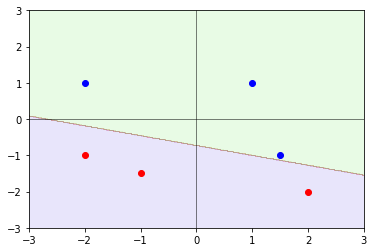

In [2]:
# Linearly separable Data sets
#X = [[1,1], [2,2], [4,4], [5,5], [5,4]]
#y = [1, 1, 0, 0, 0]

X = [[1,1], [2,-2], [1.5,-1], [-2,1], [-1,-1.5], [-2,-1]]
y = [1, 0, 1, 1, 0, 0]

# XOR problrm data set
#X = [[0,0], [1,0], [0,1], [1,1]]
#y = [1, 0, 0, 1]

# Add bias term to X
Xb = np.c_[np.ones((np.shape(X)[0], 1)), X]    

# Initialize random weight
weight = 5*np.random.random_sample((3)) - 5
eta    = 0.1
epoch  = 2000

idx = 0
print('\nInitial weight: ['+'  '.join('{:6.2f}'.format(f) for f in weight)+']\n')
# Single perceptron training
for iter in range(epoch):
    error = 0.
    for x, yt in zip(Xb, y):
        y_pred = np.heaviside(x.dot(weight), 0.0)
        err = yt - y_pred
        weight = weight + eta*err*x
        error += np.abs(err)/6.
    idx += 1
    print('Epoch: {0:3d},  error: {1:6.3f},'.format(idx, error) + \
          '   weight: ['+'  '.join('{:6.2f}'.format(f) for f in weight)+']')
    
    # The data set is linearly separable. So we use zero error as the exit condition.
    if (error < 1.e-6):
        break

print('\nDecision boundary interceptions: ')
print('x0:{0:8.3f}, y0:{1:8.3f}'.format(-weight[0]/weight[1], -weight[0]/weight[2]))

# Plot data and decision boundary
size = 400
xmin = np.min(np.amin(X, axis=0))-1
xmax = np.max(np.amax(X, axis=0))+1
ymin = np.min(np.amin(X, axis=1))-1
ymax = np.max(np.amax(X, axis=1))+1

xx, yy = np.meshgrid( np.linspace(xmin, xmax, size), np.linspace(ymin, ymax, size))

mesh   = np.c_[xx.ravel(), yy.ravel()]
# Add bias term to the mesh
meshb  = np.c_[np.ones((mesh.shape[0], 1)), mesh]
z  = np.heaviside(meshb.dot(weight), 1.0)
zz = np.reshape(z, xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, zz, cmap=plt.cm.brg, alpha=0.1)

# Plot data points
style = [ 'bo' if x > 0 else 'ro'  for x in y ]
for x, c in zip(X, style):
    plt.plot(x[0], x[1], c)   
plt.hlines(0, xmin, xmax, color='k', lw=0.5)
plt.vlines(0, ymax, ymin, color='k', lw=0.5)    
plt.show()

---

### XOR classification problem

This the problem of using a neural network to predict the outs of XOR logic gates given two binary inputs. The possible inputs and outs of XOR gates are

| input 1 | input 2 | output |
|---------|---------|--------|
|     0   |     0   |    0   |   
|     0   |     1   |    1   |
|     1   |     1   |    0   |
|     1   |     0   |    1   |

This problem can also be demonstrated using the Cartesian coordinate system, shown as follows:

<img src="./images/fig_XOR.png" width='240'>

The figure clearly shows that there is no way of seperating squares and triangles using one decision boundary. This is true for a single layer perceptron as well as for any linear classification models. __We can also demonstrate this issue by applying the single perceptron model we just built to the XOR data set.__ The training error will never converge to the minimum.

A solution to the XOR problem is to stack multiple perceptron layers, forming the so-called multi-layer perceptron (MLP). A MLP shown in the following figure can solve the XOR problem.

<img src="./images/fig_XOR_MLP.png" width='240'>



---

### Multi-Layer Perceptron (MLP) and backpropagation

An MLP is composed of one input layer, one or more layers of LTUs called hidden layers, and one final layer of LTUs called the output layer. The following figure is an example.

<img src="./images/fig_MLP.png" width='500'>

The most important development in neural network training is the idea of backpropagation algorithm. It could be described as __gradient descent using reverse-mode autodiff.__ Here is a breakdown of the algorithm

For each training instance $x$:
- Feed $x$ to the network and computes the outputs of every neuron in each layer. That is, forward pass.
- Measure the network's output error by comparing the desired output and actual output.
- Computes how much each neuron in the last hidden layer contributed to each output neuron's error.
- Estimates how much of these error contributions came from the previous layer.
- Keep doing the same backward error estimation until the algorithm reaches the input layer.
- The last step: apply Gradient Descent on all connection weights using the error gradients measured previously. So the weights get adjusted in order to redue the error.

The reverse pass efficiently measures the error gradient across all the connection weights by __propagating the error gradient backward__ in the network. 

In order for the calculation of gradients to work, one needs to use a differentiable activation function. Common candidates are:
- Logistic function $$f(z) = 1/(1+\exp(-z)).$$
- Hyperbolic tangent function $$f(z) = \tanh(z).$$
- ReLU function $$f(z) = \mbox{max}(0,z).$$

An MLP is often used for classification, with each output corresponding to a different binary class. __When the classes are exclusive, the softmax function is often shared across the output layer as the activation function.__

---

Under the hood, how does backpropagation work? Before we dive into details, let's examine two other accurate numerical approaches for computing gradients.
- #### Forward-Mode Autodiff
  This method is based on two very simple ideas: dual numbers and Taylor expansion.
  
  Dual number is a real number of the form $a+b\epsilon$, where $a$, $b$, and $\epsilon$ are all real numbers.
  In particular, $\epsilon$ is an infinitesimal number such that it satisfies $\epsilon^2=0$ within numerical
  accuracy.
  
  Next is the Taylor expansion. For any real differentiable function $f(z)$, we can expan the it around $z=z_0$:

  $$ f(z) = f(z_0) + f'(z_0)(z-z_0) + \frac{1}{2!}f''(z_0)(z-z_0)^2 + \frac{1}{3!}f'''(z_0)(z-z_0)^3 + \ldots$$
  
  So by letting $z=a+\epsilon$ and $z_0=a$, we have
  
  $$ f(a+b\epsilon) = f(a) + f'(a)\,\epsilon$$
  
  Higher order terms vanish because $\epsilon^2=0$. So by computing $f(a+\epsilon)$, we automatically get $f'(a)$ 
  from the coefficient of the $\epsilon$ term.
  
  The downside of the forward-mode autodiff method is that for a function with $k$ variables, the number of
  calculations required to get $f'(z_i)$ for $\forall\, i \in (1, \ldots, k)$ is proportional to $k$. So the 
  computational cost could be expansion for training sets with a huge number of features.
  
  Now let's look at an example. Suppose we are given a function
  
  $$f(x, y) = x^2y+y+2,$$
  
  and we would like to compute its partial derivative $\partial f/\partial x$ evaluated a $(x,y)=(3,4)$. Based on the
  rule we just discussed, we can proceed as follows
  
  $$ f(3+\epsilon, 4) = 4(3+\epsilon)^2 + 4 + 2 = 42+24\epsilon,$$
 
  which can be summarized y the following graph. Therefore we immediately have $\partial f/\partial x|_{(3,4)} = 24$. 
  
  <img src="./images/fig_Forward_Autodiff.png" width='400'>

- #### Reverse-Mode Autodiff
  The reverse-mode first works the graph in the forward direction. In the first pass, it computes the 
  value of every node (labeled by $n_1\sim n_7$ in the following figure) of the graph. In the second
  pass, the method computes all the partial derivatives using __chain rule__. Because the graph maps out all
  functional dependency between nodes  
  $$
  \begin{align}
    n_7 &= n_5 + n_6,\\
    n_6 &= n_2 + n_3, \\
    n_5 &= n_4 \times n_2,\\
    n_4 &= n_1 \times n_1.
  \end{align}
  $$
  
  These relations enable us to work out the desired derivaties. For example, $n_7$ is an output 
  node that simply gives the node's value: $f = n_7$. Therefore 
  
  $$\frac{\partial f}{\partial n_7}=1.$$
  
  Moving on to the next level, we could compute the derivative with respect to $n_6$ and $n_5$:

  $$
  \begin{align}
      \frac{\partial f}{\partial n_6} &= \frac{\partial f}{\partial n_7}\frac{\partial n_7}{\partial n_6} 
                                       = 1 \times 1 = 1,\\
      \frac{\partial f}{\partial n_5} &= \frac{\partial f}{\partial n_7}\frac{\partial n_7}{\partial n_5} 
                                       = 1 \times 1 = 1.
  \end{align}
  $$
  
  Similarly, we have:

  $$
  \begin{align}
      \frac{\partial f}{\partial n_4} &= \frac{\partial f}{\partial n_5}\frac{\partial n_5}{\partial n_4} 
                                       = 1 \times n_2 = 4, \\
      \frac{\partial f}{\partial n_3} &= \frac{\partial f}{\partial n_6}\frac{\partial n_6}{\partial n_3} 
                                       = 1 \times 0 = 0, \\                                   
      \frac{\partial f}{\partial n_2} &= \frac{\partial f}{\partial n_6}\frac{\partial n_6}{\partial n_2} +
                                         \frac{\partial f}{\partial n_5}\frac{\partial n_5}{\partial n_2}
                                       = 1 \times 1 + 1\times n_4 = 10, \\
      \frac{\partial f}{\partial n_1} &= \frac{\partial f}{\partial n_4}\frac{\partial n_4}{\partial n_1} 
                                       = 4 \times 2n_1 = 24.
  \end{align}
  $$

  We can see that by the time we reach the input nodes $n_1=x$ and $n_2=y$, all the necessary partial
  derivatives have been computed. As a result, we can immediately obtain 
  $\partial f/\partial x|_{(3,4)} = 24$ and $\partial f/\partial y|_{(3,4)} = 10$.
  
  The reverse-mode autodiff method for the graph $f(x,y)=x^2y+y+2$ is summarized by the following graph

  <img src="./images/fig_Reverse_Autodiff.png" width='600'>
  
  The reverse-mode autodiff is powerful in that it only needs one pass for an arbitrary number of inputs.
  As a result, the ${\cal O}(n_{outputs}+1)$ computational cost is much less than the forward-mode autodiff
  ${\cal O}(n_{inputs})$ for a dataset that have a huge number of input features (here $n_{inputs}$ and 
  $n_{outputs}$ are the number of inputs and outputs of the graph).
 

---

### Backpropagation, in greater detail

Now it is time to describe the idea of backpropagation. We will use the following neural network structure as 
an example.

<img src="./images/fig_backpropagation.png" width='550'>

The network consists of an input layer with $K$ neurons $x_1,\ldots, x_K$, an output layer with $M$ neurons 
$y_1,\ldots, y_M$. The hidden layer has $N$ neurons $h_1,\ldots, h_N$. The weights between input-hidden and
hidden-output layers are characterized collectively by $\{w_{ki}\}$ and $\{w'_{ij}\}$. The activation function
$\varphi(z)$ is smooth and differentiable. As described above, there are several options. Here we use the logistic
function

$$ \varphi(z) = \frac{1}{1+e^{-z}}, $$

whose first derivative has a nice form

$$ \varphi'(z) = \varphi(z)\left( 1-\varphi(z) \right). $$

An output neuron, say, $y_j$, takes $h_1$, $h_2$, $\ldots$, $h_N$ from the hidden layer and form
a weighted sum

$$u'_j = \displaystyle\sum_{i=1}^N w'_{ij}\,h_i.$$

$u'_j$ is then fed to the activation function in order to decide the output $y_j$:

$$ y_j = \varphi(u'_j).$$

The same procedure applies to other layer outputs.

The purpose of network training is to find a set of weights $\{w_{ki}\}$ and $\{w'_{ij}\}$ so that for a given
set of training instances, the output error $E$ can be as low as possible. A typical mearure of $E$ is the mean
squared error

$$ E = \frac{1}{2M}\sum_{j=1}^M\,\left( y_j - t_j \right)^2, $$

where $t_j$ is the target output of the $j$-th output neuron. If one plots $E$ as a function of $y_j$ and $t_j$,
the result will be a paraboloid, which has a global minimum. In this sense, deep learning (or in general, machine
learning) at the very heart is an optimization (minimization) problem. The most common method for searching
the minimum is gradient descent. For this purpose, we need to compute gradients of $E$ with respect to all the
weights. This is when the idea of backpropagation comes into play.

Let's begin with the output layer and compute the drivative of $E$ with respect to $w'_{ij}$. Recall that $E$ is
a function of $y_j$ which in turn depends on $w'_{ij}$ and $h_i$ through the activation function. Therefore

$$ 
   \frac{\partial E}{\partial w'_{ij}} = \frac{\partial E}{\partial y_j}\,
                                         \frac{\partial y_j}{\partial u'_j}\,
                                         \frac{\partial u'_j}{\partial w'_{ij}}. 
$$

Recall that $y_j = \varphi(u'_j)$ and that $u'_j$ is just a weighted sum of $h_i$, we have

$$
   \frac{\partial E}{\partial w'_{ij}} = \frac{\partial E}{\partial y_j}\cdot
                                        y_j\cdot(1-y_j)\cdot h_i.
$$

With this gradient, the weight $w'_{ij}$ is updated as

$$ w'^{,new}_{ij} = w'^{,old}_{ij} - \eta \cdot \frac{\partial E}{\partial y_j}\cdot
                                        y_j\cdot(1-y_j)\cdot h_i. $$

Now to compute the derivative with respect to the weights that couple the input and hidden layers, we proceed
as follow.

$$
  \frac{\partial E}{\partial w_{ki}} = \sum_{j=1}^M\,
                                         \left( \frac{\partial E}{\partial y_j}\,
                                         \frac{\partial y_j}{\partial u'_j}\,
                                         \frac{\partial u'_j}{\partial h_i}\right)\,
                                         \frac{\partial h_i}{\partial u_i}\,
                                         \frac{\partial u_i}{\partial w'_{ij}}.
$$

The summation is required in order to take into account the fact that the hidden unit that $w_{ki}$ connects to is
itself connected to every output unit. Using the definition of $u'_j$ and $u_i$, we arrive at the following equation

$$
\frac{\partial E}{\partial w_{ki}} = \sum_{j=1}^M\,
                                         \left(\frac{\partial E}{\partial y_j}\cdot
                                         y_j \cdot (1-y_j)\cdot w'_{ij} \right)\cdot
                                         h_i\cdot (1-h_i) \cdot x_k.
$$

With the gradient vector in hand, we can update the weight $w_{ki}$ accordingly

$$ w^{new}_{ki} = w_{ki}^{old} - \eta\cdot \sum_{j=1}^M\,
                                         \left(\frac{\partial E}{\partial y_j}\cdot
                                         y_j \cdot (1-y_j)\cdot w'_{ij} \right)\cdot
                                         h_i\cdot (1-h_i) \cdot x_k.
$$

The same procedure is repeated if there are more than one hidden layers until the input layer is reached.
Because the error gets propagated in reversed direction, from output all the way to input neurons, the 
algorithm is hence called backpropagation. This, in essense, is the reverse-mode autodiff we just saw
in the earlier discussion. In that example, the computation of $\partial f/\partial n_2$ needs to take
into account the contribution from both nodes $n_5$ and $n_6$.